# Rozpoznawanie jednostek nazewniczych

Narzędzia:

*   rozpoznawanie i kategoryzacja:
  *   spaCy
  *   PolDeepNer2 — **wymaga GPU**,
* lematyzacja:
  *   Polem 



### spaCy

Modele:


*   pl_core_news_sm
*   pl_core_news_md
*   pl_core_news_lg
*   **pl_spacy_model_morfeusz**



#### Przygotowanie

In [ ]:
!pip install spacy==2.3.2 -U

     |████████████████████████████████| 10.0MB 17.4MB/s 
     |████████████████████████████████| 2.1MB 38.5MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [ ]:
!wget -O - http://download.sgjp.pl/apt/sgjp.gpg.key|sudo apt-key add -
!sudo apt-add-repository http://download.sgjp.pl/apt/ubuntu
!sudo apt update
!sudo apt install libmorfeusz2
!sudo apt install python3-morfeusz2
!wget http://download.sgjp.pl/morfeusz/20210221/Linux/18.04/64/morfeusz2-1.9.17-cp37-cp37m-linux_x86_64.whl -O morfeusz2-1.9.17-cp37-cp37m-linux_x86_64.whl
!python3 -m pip install --upgrade --force-reinstall morfeusz2-1.9.17-cp37-cp37m-linux_x86_64.whl

--2020-12-31 13:38:53--  http://download.sgjp.pl/apt/sgjp.gpg.key
Resolving download.sgjp.pl (download.sgjp.pl)... 193.0.67.154
Connecting to download.sgjp.pl (download.sgjp.pl)|193.0.67.154|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1029 (1.0K) [application/pgp-keys]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.00K  --.-KB/s    in 0s      

2020-12-31 13:38:54 (148 MB/s) - written to stdout [1029/1029]

OK
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [41.5 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit

In [ ]:
! wget -P zasoby http://mozart.ipipan.waw.pl/~alina/zasoby/data/pl_spacy_model_morfeusz-0.1.3.tar.gz

--2020-12-31 13:39:13--  http://mozart.ipipan.waw.pl/~alina/zasoby/data/pl_spacy_model_morfeusz-0.1.3.tar.gz
Resolving mozart.ipipan.waw.pl (mozart.ipipan.waw.pl)... 213.135.36.148
Connecting to mozart.ipipan.waw.pl (mozart.ipipan.waw.pl)|213.135.36.148|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229068993 (218M) [application/x-gzip]
Saving to: ‘zasoby/pl_spacy_model_morfeusz-0.1.3.tar.gz’

pl_spacy_model_morf 100%[===================>] 218.46M  24.3MB/s    in 10s     

2020-12-31 13:39:24 (21.8 MB/s) - ‘zasoby/pl_spacy_model_morfeusz-0.1.3.tar.gz’ saved [229068993/229068993]



In [ ]:
! python -m pip install zasoby/pl_spacy_model_morfeusz-0.1.3.tar.gz

Processing ./zasoby/pl_spacy_model_morfeusz-0.1.3.tar.gz
     |████████████████████████████████| 184kB 11.8MB/s 
     |████████████████████████████████| 320.4MB 50kB/s 
     |████████████████████████████████| 460kB 51.6MB/s 
  Created wheel for pl-spacy-model-morfeusz: filename=pl_spacy_model_morfeusz-0.1.3-cp36-none-any.whl size=229138616 sha256=54ee2a746066509c920dc9b1b757f7bb2b1ca94832022438ba8e1937e3616a8e
  Stored in directory: /root/.cache/pip/wheels/9c/e8/f2/42317970badff72e337a282a28ad5d714491776d6d8ec1f86d
  Created wheel for distance: filename=Distance-0.1.3-cp36-none-any.whl size=16261 sha256=d262f00458d1358702f9e0163045d757368886d328d80255c352cdfb154b8e4f
  Stored in directory: /root/.cache/pip/wheels/d5/aa/e1/dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built pl-spacy-model-morfeusz distance
ERROR: tensorflow 2.3.1 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
  Found existing installation: tensorflow-estimato

In [ ]:
!python -m spacy link pl_spacy_model_morfeusz pl_spacy_model_morfeusz -f

2020-12-31 13:41:08.036021: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/pl_spacy_model_morfeusz -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pl_spacy_model_morfeusz
You can now load the model via spacy.load('pl_spacy_model_morfeusz')


#### Analiza tekstu

In [ ]:
import spacy
nlp = spacy.load("pl_spacy_model_morfeusz")

In [ ]:
text = "28 grudnia 2019 pan Igor Woźny szedł ul. Szeroką i spostrzegł Audi stojące przed Muzeum II Wojny Światowej."
doc = nlp(text)

In [ ]:
for ent in doc.ents:
    print(f"{ent.start_char:<3} {ent.end_char:<3}  {ent.label_:<10}  {ent.text}")

0   15   date        28 grudnia 2019
20  30   persName    Igor Woźny
37  48   geogName    ul. Szeroką
62  66   orgName     Audi
81  106  orgName     Muzeum II Wojny Światowej


In [ ]:
from spacy import displacy

displacy.render(doc, style='ent', jupyter=True, options={'distance': 90})

In [ ]:
text = "Warszawa to stolica Polski. Ulica Pułkowa biegnie wzdłuż Wisły."
doc = nlp(text)
displacy.render(doc, style='ent', jupyter=True, options={'distance': 90})

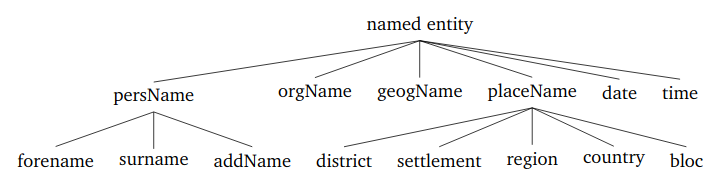

### PolDeepNer2

*   https://github.com/CLARIN-PL/PolDeepNer2
*   https://pypi.clarin-pl.eu/packages/poldeepner2-0.1.0-py3-none-any.whl#md5=333b5d5270c6b1f6cd50df5c4c89f4dd



#### Przygotowanie

In [ ]:
!pip install https://pypi.clarin-pl.eu/packages/poldeepner2-0.1.0-py3-none-any.whl#md5=333b5d5270c6b1f6cd50df5c4c89f4dd

     |████████████████████████████████| 307kB 12.4MB/s 
     |████████████████████████████████| 184kB 36.9MB/s 
     |████████████████████████████████| 10.5MB 38.1MB/s 
     |████████████████████████████████| 1.4MB 54.7MB/s 
     |████████████████████████████████| 276kB 51.2MB/s 
     |████████████████████████████████| 71kB 10.6MB/s 
     |████████████████████████████████| 1.1MB 46.1MB/s 
     |████████████████████████████████| 890kB 48.5MB/s 
     |████████████████████████████████| 133kB 59.1MB/s 
     |████████████████████████████████| 71kB 11.6MB/s 
     |████████████████████████████████| 7.2MB 45.3MB/s 
  Created wheel for fairseq: filename=fairseq-0.9.0-cp36-cp36m-linux_x86_64.whl size=2064561 sha256=12091735c63f0699a5e3413911562df2e82cef457e6644612c9393cb4f277f0d
  Stored in directory: /root/.cache/pip/wheels/37/3e/1b/0fa30695dcba41e4b0088067fa40f3328d1e8ee78c22cd4766
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434675 sha256=b80e56723d2ea55efbf02146e41f517

In [ ]:
!python -m spacy download pl_core_news_sm
!python -m spacy link pl_core_news_sm pl_core_news_sm -f

     |████████████████████████████████| 48.7MB 1.2MB/s 
  Created wheel for pl-core-news-sm: filename=pl_core_news_sm-2.3.0-cp36-none-any.whl size=48719490 sha256=98d39438486582b789fb1880a334ebd155618e51e001df0c9565fc5428f6b918
  Stored in directory: /tmp/pip-ephem-wheel-cache-5rst9o91/wheels/ce/7a/53/aab09c53056da9fefa67b44d57202e9bd556825e12ca89fff1
Successfully built pl-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pl_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/pl_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pl_core_news_sm
You can now load the model via spacy.load('pl_core_news_sm')


In [ ]:
import poldeepner2.models
ner_nkjp = poldeepner2.models.load("nkjp-base-sq")

nkjp_base_sq.zip: 462MB [00:18, 24.5MB/s]                           
roberta_base_fairseq.zip: 231MB [00:03, 69.9MB/s]                           


loading archive file models/roberta_base_fairseq
| dictionary: 50000 types


In [ ]:
ner_kpwr = poldeepner2.models.load("kpwr-n82-base")

kpwr_n82_base.zip: 452MB [00:18, 24.3MB/s]                           


loading archive file models/roberta_base_fairseq
| dictionary: 50000 types


#### Analiza tekstu

##### Model NKJP




In [ ]:
names = ner_nkjp.process_text(text)
names

[AnnotationText(begin=0, end=8, label='placeName_settlement', text='Warszawa'),
 AnnotationText(begin=20, end=26, label='placeName_country', text='Polski'),
 AnnotationText(begin=28, end=41, label='geogName', text='Ulica Pułkowa'),
 AnnotationText(begin=57, end=62, label='geogName', text='Wisły')]

In [ ]:
for ne in names:
  print(f"{ne.begin:<3} {ne.end:<3}  {ne.label:<20}  {ne.text}")

0   8    placeName_settlement  Warszawa
20  26   placeName_country     Polski
28  41   geogName              Ulica Pułkowa
57  62   geogName              Wisły


#### Model KPWr

In [ ]:
for ne in ner_kpwr.process_text(text):
  print(f"{ne.begin:<3} {ne.end:<3}  {ne.label:<22}  {ne.text}")

0   8    nam_loc_gpe_city        Warszawa
20  26   nam_loc_gpe_country     Polski
34  41   nam_fac_road            Pułkowa
57  62   nam_loc_hydronym_river  Wisły


#### Analiza sekwencji tokenów


In [ ]:
tokens = "Jan Nowak mieszka w Warszawie".split(" ")
tokens

['Jan', 'Nowak', 'mieszka', 'w', 'Warszawie']

In [ ]:
labels = ner_kpwr.process_tokenized([tokens])
labels[0]

['B-nam_liv_person', 'I-nam_liv_person', 'O', 'O', 'B-nam_loc_gpe_city']

In [ ]:
for token, label in zip(tokens, labels[0]):
  print(f"{token:<10} {label}")

Jan        B-nam_liv_person
Nowak      I-nam_liv_person
mieszka    O
w          O
Warszawie  B-nam_loc_gpe_city


In [ ]:
from poldeepner2.utils.data_utils import wrap_annotations

names = wrap_annotations(labels)
names

In [ ]:
print(names[0].annotation)
print(names[0].token_ids)

nam_liv_person
[0, 1]


In [ ]:
for an in names:
  orth = " ".join(tokens[n] for n in an.token_ids)
  label = an.annotation
  print(f"{orth:<20} {label}")

Jan Nowak            nam_liv_person
Warszawie            nam_loc_gpe_city


## Polem (lematyzacja)

Narzędzie do lematyzacji wyrażeń wielowyrazowych oraz nazw własnych.

https://github.com/CLARIN-PL/Polem

Cechy:

1.   Lematyzacja nazw własnych z wykorzystaniem kategorii KPWr.
2.   Wymaga analizy morfologicznej zgodnej z tagsetem NKJP.



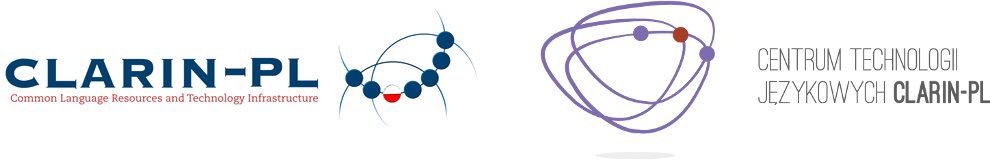

Narzędzie **Polem** dostępne jest jako **usługa sieciowa** w ramach infrastruktury **CLARIN-PL**.

In [ ]:
import requests
import json

In [ ]:
phrase =["Brytyjskiej Izby Handlowej", 
         "brytyjski izba handlowy", 
         "adj:sg:gen:f:pos subst:sg:gen:f adj:sg:gen:f:pos", 
         "True True False", 
         "nam_org"]

phrases = [phrase]

print(phrases)

[['Brytyjskiej Izby Handlowej', 'brytyjski izba handlowy', 'adj:sg:gen:f:pos subst:sg:gen:f adj:sg:gen:f:pos', 'True True True', 'nam_org']]


In [ ]:
payload = {'lexeme_polem': phrases, 
           'tool': 'polem', 
           'options': [], 
           'lexeme':'', 
           'task':'all'}

headers = {'content-type': 'application/json'}

url = 'http://ws.clarin-pl.eu/lexrest/lex'

response = requests.post(url, data=json.dumps(payload), headers=headers).text
response

'{"input":{"task":"all","options":[],"lexeme":"","lexeme_polem":[["Brytyjskiej Izby Handlowej","brytyjski izba handlowy","adj:sg:gen:f:pos subst:sg:gen:f adj:sg:gen:f:pos","True True True","nam_org"]],"tool":"polem"},"totaltime":0.013,"time":0.0046117305755615234,"error":"","results":["Brytyjska Izba Handlowa"]}'

In [ ]:
result = json.loads(response)

for phrase, lemma in zip(result["input"]["lexeme_polem"], result["results"]):
  print(f"{phrase[0]}  ->  {lemma}")


Brytyjskiej Izby Handlowej  ->  Brytyjska Izba Handlowa


## Pełny potok przetwarzania


1.   Tokenizacja i analiza morfologiczna (tagset NKJP)
2.   Rozpoznanie i kategoryzacja jednostek nazewniczych (KPWr)
4.   Lematyzacja jednostek nazewniczych



In [ ]:
text = "Poznawanie dziedzictwa kulturowego w Europie Środkowej na Międzynarodowym Szlaku Kościołów THETRIS"

In [ ]:
doc = nlp(text)

orths = [t.text for t in doc]
orths

['Poznawanie',
 'dziedzictwa',
 'kulturowego',
 'w',
 'Europie',
 'Środkowej',
 'na',
 'Międzynarodowym',
 'Szlaku',
 'Kościołów',
 'THETRIS']

In [ ]:
labels = ner_kpwr.process_tokenized([orths])
labels[0]

['O',
 'O',
 'O',
 'O',
 'B-nam_loc_land_region',
 'I-nam_loc_land_region',
 'O',
 'B-nam_eve_human',
 'I-nam_eve_human',
 'I-nam_eve_human',
 'I-nam_eve_human']

In [ ]:
from poldeepner2.utils.data_utils import wrap_annotations

names = wrap_annotations(labels)
names

In [ ]:
phrases = []

for an in names:  
  orth = " ".join(doc[n].text for n in an.token_ids)
  lemma = " ".join(doc[n].lemma_ for n in an.token_ids)
  ctag = " ".join(f"{[doc[n].tag_]}:{doc[n]._.feats}]".rstrip(":") for n in an.token_ids)
  ws = " ".join(str(len(doc[n].whitespace_)>0) for n in an.token_ids)
  print(f"{orth}\n{lemma}\n{ctag}\n{ws}\n{an.annotation}\n")

  phrases.append([orth, lemma, ctag, ws, an.annotation])

Europie Środkowej
Europa środkowy
subst:sg:loc:f adj:sg:loc:f:pos
True True
nam_loc_land_region

Międzynarodowym Szlaku Kościołów THETRIS
międzynarodowy szlak kościół THETRIS
adj:sg:loc:m3:pos subst:sg:loc:m3 subst:pl:gen:m3 interp
True True True False
nam_eve_human



In [ ]:
payload = {'lexeme_polem': phrases, 'tool': 'polem', 'options': [], 'lexeme':'', 'task':'all'}
headers = {'content-type': 'application/json'}
url = 'http://ws.clarin-pl.eu/lexrest/lex'

response = requests.post(url, data=json.dumps(payload), headers=headers).text
response

'{"input":{"task":"all","options":[],"lexeme":"","lexeme_polem":[["Europie Środkowej","Europa środkowy","subst:sg:loc:f adj:sg:loc:f:pos","True True","nam_loc_land_region"],["Międzynarodowym Szlaku Kościołów THETRIS","międzynarodowy szlak kościół THETRIS","adj:sg:loc:m3:pos subst:sg:loc:m3 subst:pl:gen:m3 interp","True True True False","nam_eve_human"]],"tool":"polem"},"totaltime":0.015,"time":0.007588863372802734,"error":"","results":["Europa Środkowa","Międzynarodowy Szlak Kościołów THETRIS"]}'

In [ ]:
result = json.loads(response)

for phrase, lemma in zip(result["input"]["lexeme_polem"], result["results"]):
  print(f"{phrase[0]:<40}  ->  {lemma}")

Europie Środkowej                         ->  Europa Środkowa
Międzynarodowym Szlaku Kościołów THETRIS  ->  Międzynarodowy Szlak Kościołów THETRIS
